In [1]:
!pip install opencv-python matplotlib pandas seaborn albumentations ultralytics


     ---------------------------------------- 0.0/43.1 kB ? eta -:--:--
     ---------------------------------------- 0.0/43.1 kB ? eta -:--:--
     ---------------------------------------- 0.0/43.1 kB ? eta -:--:--
     ---------------------------- ----------- 30.7/43.1 kB ? eta -:--:--
     -------------------------------------- 43.1/43.1 kB 698.7 kB/s eta 0:00:00
  Using cached PyYAML-6.0.2-cp311-cp311-win_amd64.whl.metadata (2.1 kB)
     ---------------------------------------- 0.0/67.2 kB ? eta -:--:--
     ------------------------------------ --- 61.4/67.2 kB 3.4 MB/s eta 0:00:01
     ---------------------------------------- 67.2/67.2 kB 1.8 MB/s eta 0:00:00
     ---------------------------------------- 0.0/81.9 kB ? eta -:--:--
     ---------------------------------------- 81.9/81.9 kB 2.3 MB/s eta 0:00:00
     ---------------------------------------- 0.0/67.8 kB ? eta -:--:--
     ---------------------------------------- 67.8/67.8 kB 3.6 MB/s eta 0:00:00
     ------------------


[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


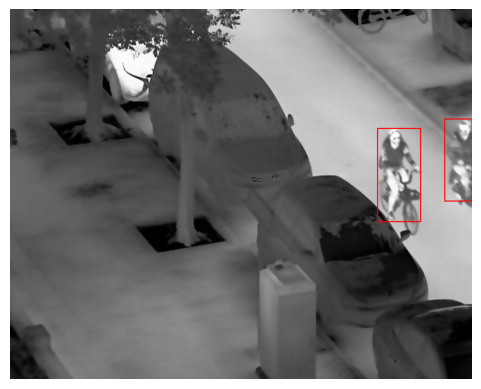

In [5]:
import cv2
import matplotlib.pyplot as plt

def plot_image_with_yolo_bbox(img_path, label_path):
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    h, w, _ = img.shape
    
    with open(label_path, 'r') as f:
        for line in f.readlines():
            cls, x, y, bw, bh = map(float, line.split())
            x1 = int((x - bw / 2) * w)
            y1 = int((y - bh / 2) * h)
            x2 = int((x + bw / 2) * w)
            y2 = int((y + bh / 2) * h)
            cv2.rectangle(img, (x1, y1), (x2, y2), (255, 0, 0), 2)
    plt.imshow(img)
    plt.axis("off")
    plt.show()

# Example
plot_image_with_yolo_bbox(
    r"Thermal-image-human-detection\dataset\dataset\test\images\190001.jpg",
    r"Thermal-image-human-detection\dataset\dataset\test\labels\190001.txt"
)


In [5]:
import yaml
import os

data_yaml_path = "data.yaml"  # File is in the current directory

# Check if file exists and load it
if os.path.exists(data_yaml_path):
    with open(data_yaml_path, "r") as file:
        data = yaml.safe_load(file)
        print("✅ YAML loaded successfully:")
        print(data)
else:
    print("❌ data.yaml not found in:", os.getcwd())


✅ YAML loaded successfully:
{'train': 'dataset/images/train', 'val': 'dataset/images/val', 'test': 'dataset/images/test', 'nc': 1, 'names': ['person']}


In [9]:
import os

# Corrected paths based on your structure
image_dir = os.path.join("dataset", "dataset", "train", "images")
label_dir = os.path.join("dataset", "dataset", "train", "labels")

# Verify the paths
print("Image directory:", image_dir)
print("Label directory:", label_dir)

# Check if paths exist
if not os.path.exists(image_dir):
    print(f"❌ Image folder not found: {image_dir}")
else:
    print(f"✅ Found image folder at: {image_dir}")

if not os.path.exists(label_dir):
    print(f"❌ Label folder not found: {label_dir}")
else:
    print(f"✅ Found label folder at: {label_dir}")


Image directory: dataset\dataset\train\images
Label directory: dataset\dataset\train\labels
✅ Found image folder at: dataset\dataset\train\images
✅ Found label folder at: dataset\dataset\train\labels


In [13]:
import os

# Path to the labels folder
label_dir = os.path.join( "dataset", "dataset", "train", "labels")

# Check if the folder exists
if os.path.exists(label_dir):
    print(f"✅ Path exists: {label_dir}")
else:
    print(f"❌ Path does not exist: {label_dir}")


✅ Path exists: dataset\dataset\train\labels


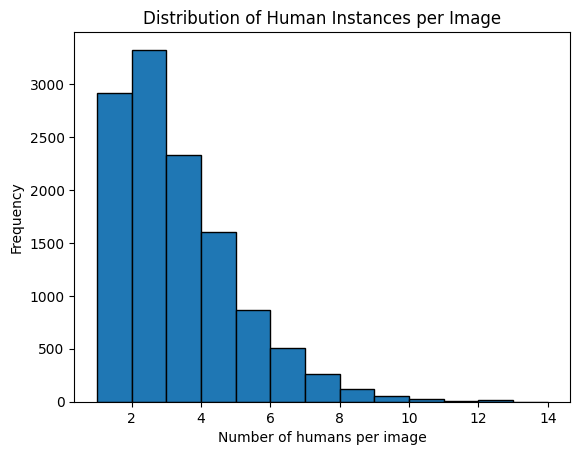

In [14]:
import os
import matplotlib.pyplot as plt

# Corrected label directory path using os.path.join()
label_dir = os.path.join( "dataset", "dataset", "train", "labels")

# Get all label files (those ending with .txt)
label_files = sorted([f for f in os.listdir(label_dir) if f.endswith('.txt')])

# Initialize list to store counts
counts = []

# Loop over each label file and count the number of bounding boxes (humans)
for label_file in label_files:
    label_path = os.path.join(label_dir, label_file)
    with open(label_path, 'r') as f:
        lines = f.readlines()
        counts.append(len(lines))

# Plot the histogram
plt.hist(counts, bins=range(1, max(counts) + 2), edgecolor='black')
plt.xlabel("Number of humans per image")
plt.ylabel("Frequency")
plt.title("Distribution of Human Instances per Image")
plt.show()


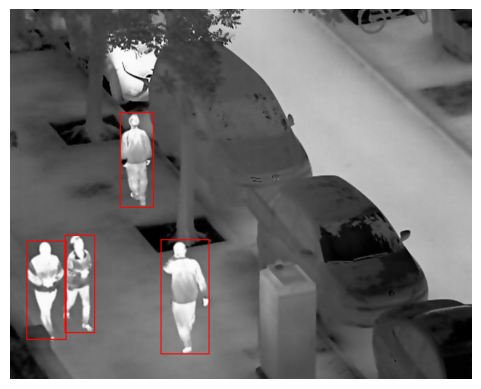

In [20]:
import cv2
import matplotlib.pyplot as plt

def plot_image_with_yolo_bbox(img_path, label_path):
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    h, w, _ = img.shape
    
    with open(label_path, 'r') as f:
        for line in f.readlines():
            cls, x, y, bw, bh = map(float, line.split())
            x1 = int((x - bw / 2) * w)
            y1 = int((y - bh / 2) * h)
            x2 = int((x + bw / 2) * w)
            y2 = int((y + bh / 2) * h)
            cv2.rectangle(img, (x1, y1), (x2, y2), (255, 0, 0), 2)
    plt.imshow(img)
    plt.axis("off")
    plt.show()

# Example
plot_image_with_yolo_bbox(
    r"dataset\dataset\test\images\190060.jpg",
    r"dataset\dataset\test\labels\190060.txt"
)


In [22]:
train_images_path = 'dataset/dataset/train/images'
train_labels_path = 'dataset/dataset/train/labels'
test_images_path = 'dataset/dataset/test/images'
test_labels_path = 'dataset/dataset/test/labels'


In [23]:
import os

img_path = r"Thermal-image-human-detection\dataset\dataset\test\images\190001.jpg"
print("Full Image Path:", os.path.abspath(img_path))


Full Image Path: c:\Users\trish\NUS project\Thermal-image-human-detection\Thermal-image-human-detection\dataset\dataset\test\images\190001.jpg


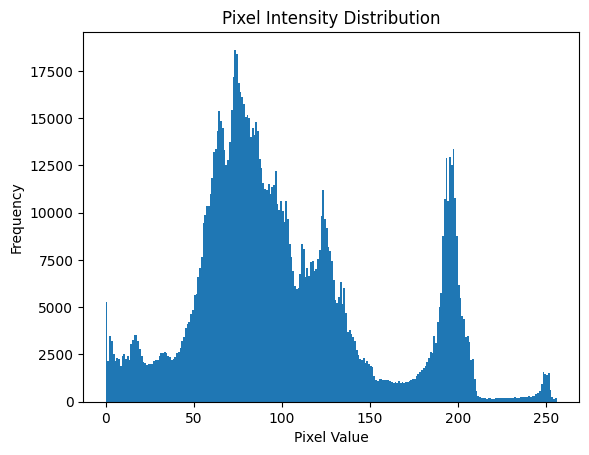

In [25]:
import cv2
import os
import matplotlib.pyplot as plt

# Corrected file path (with the correct structure)
image_filename = "190001.jpg"  # Example image file, ensure this is the correct name
img_path = os.path.join("dataset", "dataset", "test", "images", image_filename)

# Read image in grayscale
img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

# Check if the image is loaded successfully
if img is not None:
    # Plot histogram of pixel intensities
    plt.hist(img.ravel(), bins=256, range=(0, 256))
    plt.title("Pixel Intensity Distribution")
    plt.xlabel("Pixel Value")
    plt.ylabel("Frequency")
    plt.show()
else:
    print(f"Image {image_filename} not found or failed to load at: {img_path}")


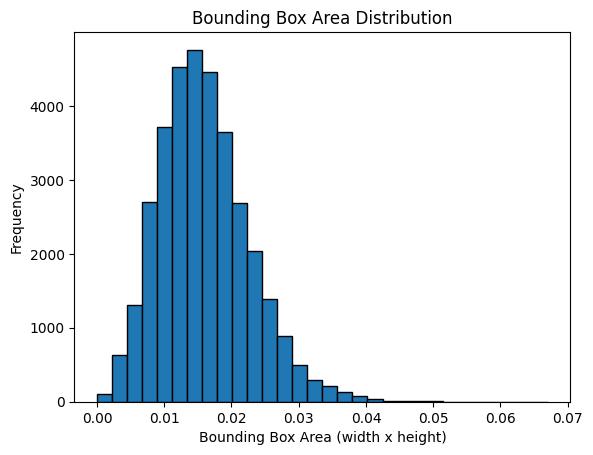

In [28]:
areas = []
for label_file in label_files:
    with open(os.path.join(label_dir, label_file)) as f:
        lines = f.readlines()
        for line in lines:
            _, x_center, y_center, width, height = map(float, line.strip().split())
            area = width * height
            areas.append(area)

plt.hist(areas, bins=30, edgecolor='black')
plt.title("Bounding Box Area Distribution")
plt.xlabel("Bounding Box Area (width x height)")
plt.ylabel("Frequency")
plt.show()



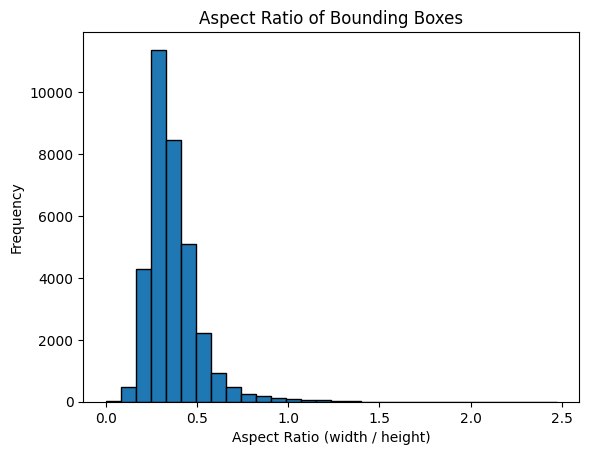

In [29]:
aspect_ratios = []
for label_file in label_files:
    with open(os.path.join(label_dir, label_file)) as f:
        lines = f.readlines()
        for line in lines:
            _, x_center, y_center, width, height = map(float, line.strip().split())
            aspect_ratio = width / height
            aspect_ratios.append(aspect_ratio)

plt.hist(aspect_ratios, bins=30, edgecolor='black')
plt.title("Aspect Ratio of Bounding Boxes")
plt.xlabel("Aspect Ratio (width / height)")
plt.ylabel("Frequency")
plt.show()


In [30]:
img_dir = os.path.join( "dataset", "dataset", "train", "images")

# Get all label files (those ending with .txt)
img_files = sorted([f for f in os.listdir(label_dir) if f.endswith('.jpg')])

In [ ]:
sample_images = [img_files[i] for i in range(6)]  # Select first 6 images (for example)
plt.figure(figsize=(10, 10))

for i, img_file in enumerate(sample_images):
    img_path = os.path.join(img_dir, img_file)
    img = cv2.imread(img_path)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Load corresponding label file and draw bounding boxes
    label_file = img_file.replace('.jpg', '.txt')
    with open(os.path.join(label_dir, label_file)) as f:
        lines = f.readlines()
        h, w, _ = img.shape
        for line in lines:
            _, x_center, y_center, width, height = map(float, line.strip().split())
            xmin = int((x_center - width / 2) * w)
            ymin = int((y_center - height / 2) * h)
            xmax = int((x_center + width / 2) * w)
            ymax = int((y_center + height / 2) * h)
            img_rgb = cv2.rectangle(img_rgb, (xmin, ymin), (xmax, ymax), (255, 0, 0), 2)

    plt.subplot(2, 3, i + 1)
    plt.imshow(img_rgb)
    plt.axis('off')
plt.show()


IndexError: list index out of range